In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sp

In [3]:
#利用pandas存入未經整理的原始數據 Dataset_raw
Dataset_raw = pd.read_csv('Final_Data_2.csv')

In [4]:
#取 Dataset_raw 中所需要的欄為存入 Dataset_df
Dataset_df = Dataset_raw[['Tin','FR','T1','T2','Qcool','RR','B','QR','Qc','FV','FL_Top','FL_Bot','T5','T10','T15','T20','T25','XME_V','XME_D','XW_B']]

In [5]:
Dataset_df

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
0,230.0,5.00,47.0,47.0,-4105.30986,1.050,99.500,2354.16766,-2158.37931,1.110966,98.549318,99.500000,64.949551,66.202021,68.100731,71.698709,80.261237,0.487842,0.995299,0.995110
1,229.8,4.91,46.6,47.3,-4105.64635,1.099,99.520,2406.24877,-2206.92944,1.173588,98.447061,99.520000,64.903154,66.063161,67.816054,71.325569,80.120886,0.494572,0.995755,0.995067
2,230.2,4.99,46.4,47.2,-4108.28073,1.074,99.560,2380.35437,-2181.04121,1.160513,98.450932,99.560000,64.922879,66.124671,67.943148,71.484500,79.882837,0.492298,0.995558,0.994554
3,230.6,5.06,46.7,46.9,-4108.54619,1.051,99.540,2355.87991,-2159.42970,1.106870,98.528582,99.540000,64.947351,66.195516,68.085184,71.666656,79.994836,0.485691,0.995298,0.994671
4,230.9,5.03,46.4,47.4,-4109.48492,1.097,99.530,2404.02755,-2204.11113,1.170476,98.439311,99.530000,64.905529,66.068933,67.826913,71.337003,80.045829,0.496759,0.995766,0.994935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34131,238.7,4.66,57.0,43.5,-2778.68173,2.570,101.975,2466.88934,-3715.32348,0.543364,96.821734,64.859134,65.779825,67.830652,74.295629,75.245604,80.543126,0.417377,0.996010,0.973971
34132,238.4,4.69,57.3,43.8,-2733.54212,2.590,101.950,2443.71320,-3737.10741,0.545191,96.911121,64.859891,65.779871,67.832493,74.344810,75.296630,80.659625,0.423115,0.996075,0.974561
34133,238.7,4.66,57.4,44.2,-2741.43180,2.600,101.930,2457.44303,-3746.68840,0.564553,96.964680,64.859930,65.779101,67.825150,74.321131,75.275515,80.697085,0.430865,0.996145,0.974983
34134,239.1,4.65,57.9,44.2,-2719.76161,2.560,101.955,2386.51443,-3701.16486,0.549742,96.874197,64.860486,65.784184,67.867261,74.457235,75.406400,80.734354,0.430865,0.996151,0.974436


In [6]:
#將 Dataset_df 以 XME_D 由大到小排列
#ascending = False 由大到小排列
Dataset_df = Dataset_df.sort_values('XME_D' , ascending = False)

In [7]:
Dataset_df

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
32983,246.8,5.50,60.0,50.0,-3081.08692,3.19,101.995,3272.41811,-4290.54683,0.740419,96.536660,64.869491,65.751206,67.460337,73.042965,74.022236,79.561888,0.557222,0.997318,0.974018
32984,246.4,5.50,60.0,50.0,-3054.77486,3.17,101.990,3234.94174,-4278.53339,0.740898,96.729662,64.869425,65.752178,67.472981,73.097673,74.080440,79.730907,0.557222,0.997318,0.974995
32960,246.9,5.44,60.0,50.0,-3083.00090,3.36,101.855,3458.58475,-4480.98888,0.746525,96.881250,64.870297,65.745899,67.395417,72.827106,73.824906,79.702172,0.557222,0.997317,0.976284
32940,246.2,5.45,60.0,50.0,-3035.71625,3.26,101.925,3314.19246,-4380.24365,0.746351,96.930517,64.869791,65.749246,67.440334,73.003909,73.996443,79.837582,0.557221,0.997316,0.976283
32963,245.8,5.41,60.0,50.0,-3002.86310,3.38,101.870,3411.27147,-4501.59462,0.750765,96.878474,64.870312,65.745867,67.400185,72.883151,73.878968,79.738230,0.557221,0.997314,0.976237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864,223.0,3.28,58.5,35.9,-4153.82466,0.30,97.890,1547.74025,-1474.53225,0.401630,100.962665,97.890000,72.573521,73.761482,74.512358,75.235027,76.481202,0.256198,0.867038,0.881689
7586,235.1,3.34,54.1,50.0,-4206.92642,0.30,98.310,1547.67433,-1414.07244,1.281027,99.580448,98.310000,72.544508,73.692995,74.443183,75.166825,76.416943,0.487563,0.867034,0.876181
7322,231.8,3.50,55.1,48.0,-4189.70743,0.30,98.830,1536.82765,-1415.98576,1.041936,99.335113,98.830000,72.559484,73.713217,74.463477,75.187017,76.416962,0.446854,0.866995,0.872679
7325,232.1,3.60,55.3,48.0,-4189.10662,0.30,98.930,1533.64015,-1414.63251,1.014074,99.244600,98.930000,72.566103,73.719653,74.469944,75.193512,76.417458,0.446827,0.866942,0.871833


In [8]:
#了解各欄位的 Data 有幾組及其資料型態
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34136 entries, 32983 to 7326
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tin     34136 non-null  float64
 1   FR      34136 non-null  float64
 2   T1      34136 non-null  float64
 3   T2      34136 non-null  float64
 4   Qcool   34136 non-null  float64
 5   RR      34136 non-null  float64
 6   B       34136 non-null  float64
 7   QR      34136 non-null  float64
 8   Qc      34136 non-null  float64
 9   FV      34136 non-null  float64
 10  FL_Top  34136 non-null  float64
 11  FL_Bot  34136 non-null  float64
 12  T5      34136 non-null  float64
 13  T10     34136 non-null  float64
 14  T15     34136 non-null  float64
 15  T20     34136 non-null  float64
 16  T25     34136 non-null  float64
 17  XME_V   34136 non-null  float64
 18  XME_D   34136 non-null  float64
 19  XW_B    34136 non-null  float64
dtypes: float64(20)
memory usage: 5.5 MB


In [9]:
# 確認個欄位中是否有空白值
Dataset_df.isnull().sum()

Tin       0
FR        0
T1        0
T2        0
Qcool     0
RR        0
B         0
QR        0
Qc        0
FV        0
FL_Top    0
FL_Bot    0
T5        0
T10       0
T15       0
T20       0
T25       0
XME_V     0
XME_D     0
XW_B      0
dtype: int64

In [10]:
#各參數間的間的相關係數
Dataset_df.corr()

,Tin,FR,T1,T2,Qcool,RR,B,QR,Qc,FV,FL_Top,FL_Bot,T5,T10,T15,T20,T25,XME_V,XME_D,XW_B
Tin,1.000000,0.549382,0.734305,0.383548,0.175723,0.377993,0.692005,0.295662,-0.365509,-0.608970,-0.138995,-0.372491,-0.211668,-0.360057,-0.232081,-0.228097,-0.153692,0.403015,0.287324,0.083020
FR,0.549382,1.000000,0.406505,0.370442,0.387864,0.419875,0.654423,0.264584,-0.409497,-0.399055,-0.272643,-0.447086,-0.396416,-0.271031,-0.013103,-0.033697,0.036208,0.412911,0.480704,0.304843
T1,0.734305,0.406505,1.000000,0.290871,0.409534,0.174138,0.598900,-0.061831,-0.162896,-0.835083,0.165694,-0.336734,0.030947,-0.245121,-0.248960,-0.278357,-0.291309,0.269338,0.057280,-0.105577
T2,0.383548,0.370442,0.290871,1.000000,0.342801,0.349449,0.403477,0.203288,-0.318731,0.151846,-0.386211,-0.464842,-0.176989,-0.163393,-0.036081,-0.085493,-0.049978,0.982037,0.291646,0.143917
Qcool,0.175723,0.387864,0.409534,0.342801,1.000000,0.502866,0.549251,0.070523,-0.498499,-0.293186,-0.310063,-0.786669,-0.288703,-0.339376,-0.059236,-0.136812,-0.053704,0.360990,0.400794,0.230634
RR,0.377993,0.419875,0.174138,0.349449,0.502866,1.000000,0.750962,0.894960,-0.999106,-0.119100,-0.702306,-0.718263,-0.531884,-0.523914,-0.222130,-0.269664,-0.133532,0.400993,0.584310,0.311801
B,0.692005,0.654423,0.598900,0.403477,0.549251,0.750962,1.000000,0.547853,-0.736918,-0.489574,-0.607721,-0.760500,-0.406979,-0.589800,-0.374272,-0.420616,-0.343264,0.443821,0.503303,0.152719
QR,0.295662,0.264584,-0.061831,0.203288,0.070523,0.894960,0.547853,1.000000,-0.898018,0.047102,-0.650348,-0.416610,-0.484324,-0.424590,-0.206482,-0.219452,-0.095164,0.254623,0.480690,0.267873
Qc,-0.365509,-0.409497,-0.162896,-0.318731,-0.498499,-0.999106,-0.736918,-0.898018,1.000000,0.123991,0.686812,0.707119,0.534132,0.520219,0.216176,0.262153,0.123230,-0.370328,-0.582796,-0.316763
FV,-0.608970,-0.399055,-0.835083,0.151846,-0.293186,-0.119100,-0.489574,0.047102,0.123991,1.000000,-0.333041,0.219670,0.026385,0.197170,0.152175,0.157250,0.146067,0.159202,-0.078326,0.017977


<AxesSubplot:>

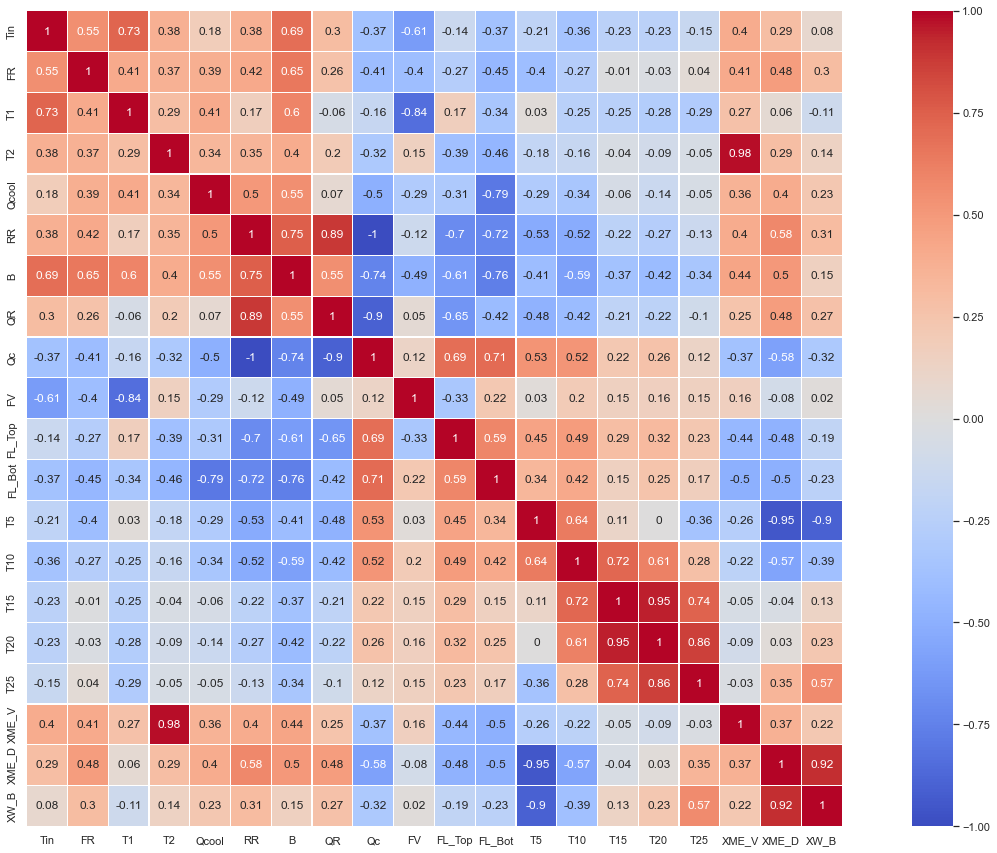

In [11]:
#利用 seaborn 繪製出熱點圖，越紅表示越正相關，越藍表示越負相關
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(Dataset_df.corr().round(2), cmap = 'coolwarm' , annot=True, linewidths=0.2, square=True)

In [12]:
#將 Dataset_df 變成 np.array
Dataset_df = np.array(Dataset_df)
# row = 列數
row = Dataset_df.shape[0]
# count 為 1*14 的 list，用來計數各組有幾個數字
count = [0]*14

#利用迴圈計算 XME_D 在各組間有幾組數據，分別存到 count 中
for i in range(row):
    for j in range(14):
        if Dataset_df[i,-2] < (1.00 - 0.01 * j) and Dataset_df[i,-2] >= (1.00 - 0.01 * (j+1)):
            count[j] += 1

print('XME_D 介於 0.99 ~ 1.00有 ' + str(count[0]) + ' 組')
print('XME_D 介於 0.98 ~ 0.99有 ' + str(count[1]) + ' 組')
print('XME_D 介於 0.97 ~ 0.98有 ' + str(count[2]) + ' 組')
print('XME_D 介於 0.96 ~ 0.97有 ' + str(count[3]) + ' 組')
print('XME_D 介於 0.95 ~ 0.96有 ' + str(count[4]) + ' 組')
print('XME_D 介於 0.94 ~ 0.95有 ' + str(count[5]) + ' 組')
print('XME_D 介於 0.93 ~ 0.94有 ' + str(count[6]) + ' 組')
print('XME_D 介於 0.92 ~ 0.93有 ' + str(count[7]) + ' 組')
print('XME_D 介於 0.91 ~ 0.92有 ' + str(count[8]) + ' 組')
print('XME_D 介於 0.90 ~ 0.91有 ' + str(count[9]) + ' 組')
print('XME_D 介於 0.89 ~ 0.90有 ' + str(count[10]) + ' 組')
print('XME_D 介於 0.88 ~ 0.89有 ' + str(count[11]) + ' 組')
print('XME_D 介於 0.87 ~ 0.88有 ' + str(count[12]) + ' 組')
print('XME_D 介於 0.86 ~ 0.87有 ' + str(count[13]) + ' 組')

XME_D 介於 0.99 ~ 1.00有 21671 組
XME_D 介於 0.98 ~ 0.99有 4327 組
XME_D 介於 0.97 ~ 0.98有 1251 組
XME_D 介於 0.96 ~ 0.97有 499 組
XME_D 介於 0.95 ~ 0.96有 460 組
XME_D 介於 0.94 ~ 0.95有 536 組
XME_D 介於 0.93 ~ 0.94有 606 組
XME_D 介於 0.92 ~ 0.93有 771 組
XME_D 介於 0.91 ~ 0.92有 689 組
XME_D 介於 0.90 ~ 0.91有 671 組
XME_D 介於 0.89 ~ 0.90有 742 組
XME_D 介於 0.88 ~ 0.89有 806 組
XME_D 介於 0.87 ~ 0.88有 730 組
XME_D 介於 0.86 ~ 0.87有 377 組


(array([  816.,   745.,   724.,   666.,   616.,   669.,   687.,   547.,
          498.,   423.,   468.,   945.,  3396., 22936.]),
 array([0.86688595, 0.87620255, 0.88551916, 0.89483576, 0.90415237,
        0.91346897, 0.92278558, 0.93210218, 0.94141879, 0.95073539,
        0.960052  , 0.9693686 , 0.97868521, 0.98800181, 0.99731842]),
 <BarContainer object of 14 artists>)

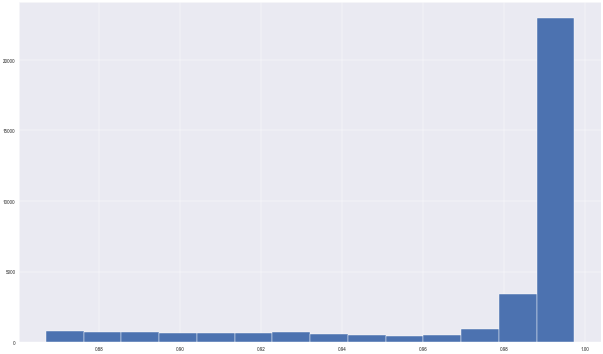

In [13]:
#將 XME_D 的數據分佈繪製成直方圖
plt.figure(dpi = 30)
plt.hist([Dataset_df[:,-2]] , bins = 14)

In [14]:
#把 XME_D 在 0.99 以上的存入 Dataset1
Dataset1 = Dataset_df[0 : count[0] , :]
#把 XME_D 在 0.98 ~ 0.99 的存入 Dataset2
Dataset2 = Dataset_df[count[0]: count[0] + count[1], :]
#把 XME_D 在 0.98 以下的存入 Dataset3
Dataset3 = Dataset_df[(count[0] + count[1]): , :]

#把 Dataset1 也就是 XME_D 在 0.99 以上的數據打亂並取前面 1000 個
Dataset1 = np.random.permutation(Dataset1)
Dataset1 = Dataset1[:1000,:]
#把 Dataset2 也就是 XME_D 在 0.98 ~ 0.99 的數據打亂並取前面 1000 個
Dataset2 = np.random.permutation(Dataset2)
Dataset2 = Dataset2[:1000,:]
#把 Dataset1 , Dataset2 , Dataset3 重新垂直堆疊成 Dataset
Dataset = np.vstack((Dataset1,Dataset2,Dataset3))

In [15]:
Data_False = Dataset3[50,:]
np.save('Data_False.npy' , Data_False)

In [16]:
# 將 Dataset 存檔
np.save('Dataset.npy' , Dataset)

In [17]:
#把 Dataset打亂，X 為前 9 欄，Y 為後 11 欄
Dataset = np.random.permutation(Dataset)
X = Dataset[:,:9]
Y = Dataset[:,9:]

#將 X 和 Y 分別做標準化得到 Z 分數
scaler_X = sp.StandardScaler().fit(X)
X_scl = scaler_X.transform(X)
scaler_Y = sp.StandardScaler().fit(Y)
Y_scl = scaler_Y.transform(Y)

(array([ 816.,  744.,  725.,  664.,  617.,  668.,  689.,  545.,  500.,
         421.,  469.,  937., 1054., 1289.]),
 array([0.86688595, 0.87619977, 0.88551359, 0.89482741, 0.90414123,
        0.91345505, 0.92276887, 0.93208269, 0.94139651, 0.95071033,
        0.96002415, 0.96933797, 0.97865179, 0.98796561, 0.99727943]),
 <BarContainer object of 14 artists>)

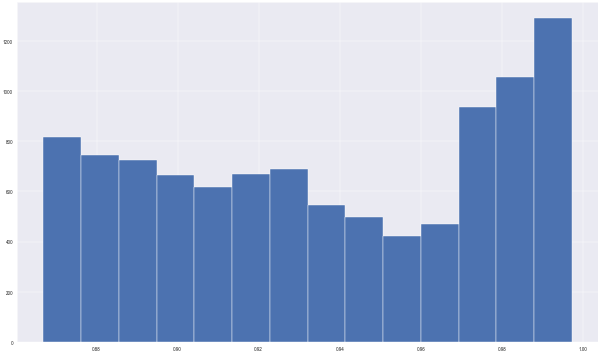

In [18]:
# 重新把 XME_D 的數據分佈繪製成直方圖 (經過 Undersampling)
plt.figure(dpi = 30)
plt.hist([Dataset[:,-2]] , bins = 14)

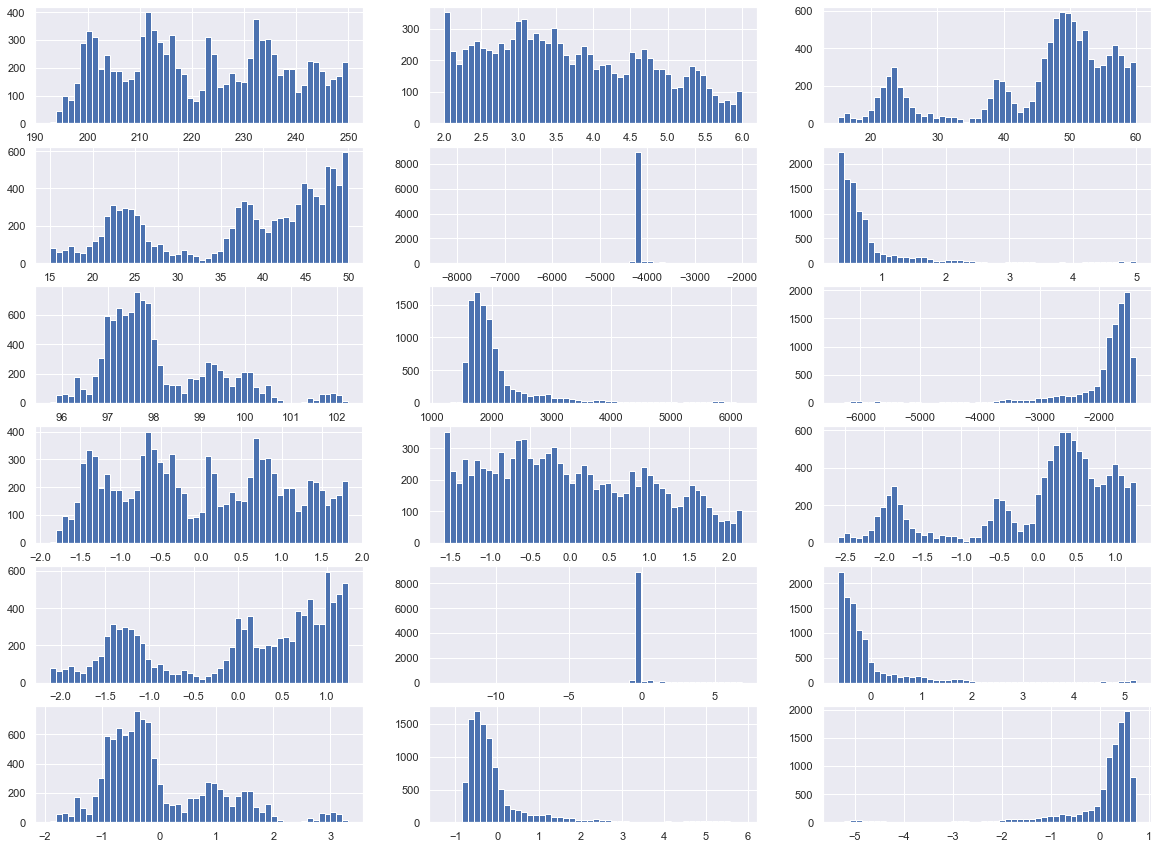

In [19]:
fig, ax = plt.subplots(6,3,figsize=(20,15))
for i in range(9):
    plt.subplot(6,3,i+1)
    plt.hist(X[:,i] , bins = 50)
    plt.subplot(6,3,i+10)
    plt.hist(X_scl[:,i] , bins = 50)

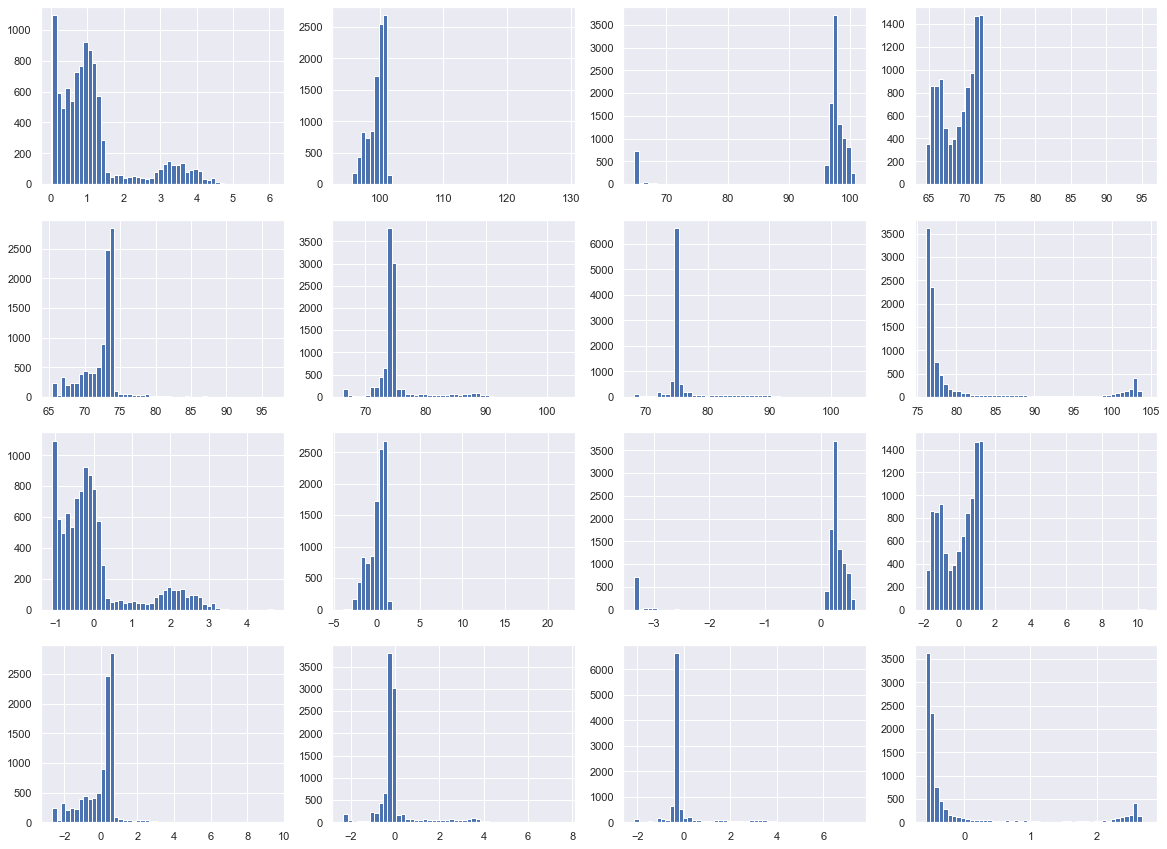

In [20]:
fig, ax = plt.subplots(4,4,figsize=(20,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.hist(Y[:,i] , bins = 50)
    plt.subplot(4,4,i+9)
    plt.hist(Y_scl[:,i] , bins = 50)

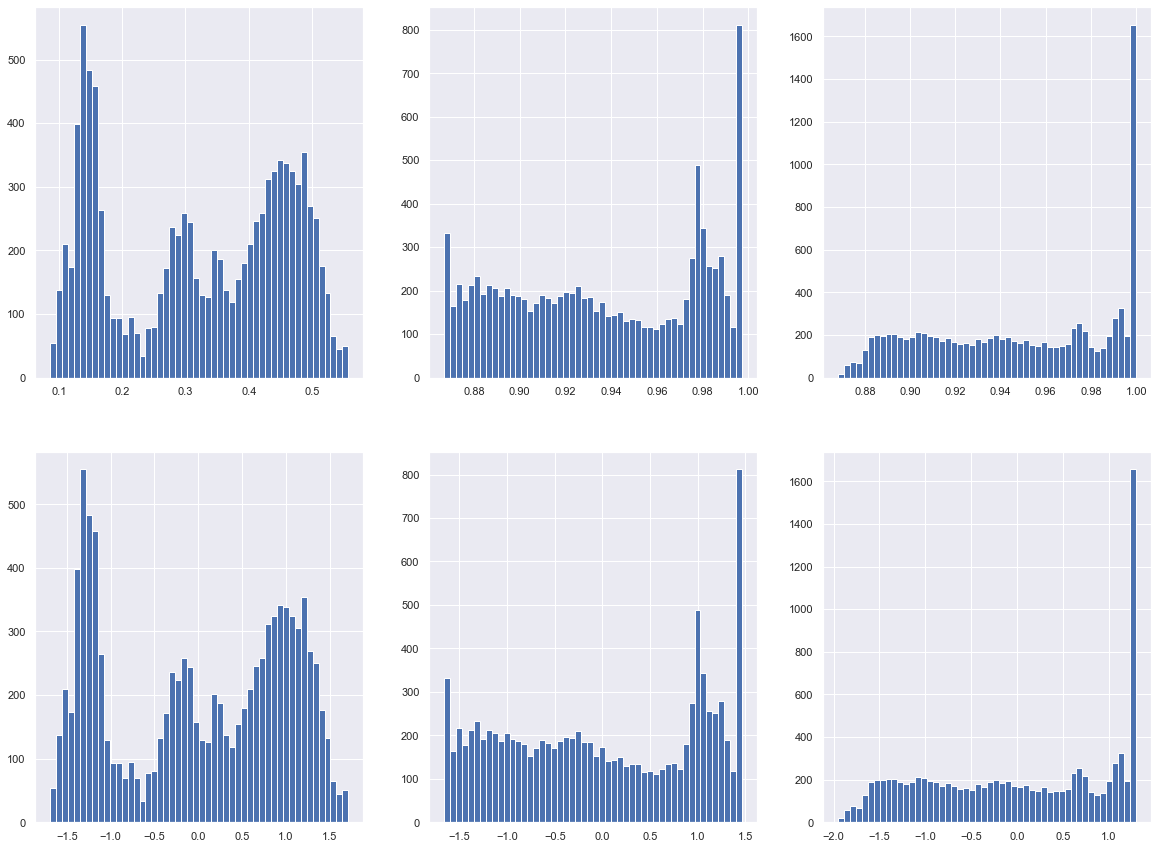

In [21]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.hist(Y[:,i+8] , bins = 50)
    plt.subplot(2,3,i+4)
    plt.hist(Y_scl[:,i+8] , bins = 50)